In [3]:
%matplotlib inline
from config import *
from model import *
from display import *
import zipfile

In [4]:
def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words"""
    with zipfile.ZipFile(filename) as f:
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    
    return data
  
words = read_data("../data/text8.zip")
print('Data size %d' % len(words))

Data size 17005207


In [10]:
vocab = set(words)

word2int = {}
int2word = {}

vocab_size = len(vocab) # gives the total number of unique words

for i,word in enumerate(vocab):
    word2int[word] = i
    int2word[i] = word

In [11]:
print "vocab size", vocab_size

vocab size 253854


In [13]:
window_size = 2
training_data = []
for i, word in enumerate(words):
    for nbword in words[max(i - window_size, 0): min(len(words), i + window_size)]:
        if (word != nbword):
            training_data.append([word, nbword])
        

In [14]:
print len(training_data)

50378579


In [21]:
def get_mini_batches(x_train, y_train, batch_size):
        if batch_size > len(x_train):
            return [x_train], [y_train]

        x_train_batches = []
        y_train_batches = []


        for i in range(0, len(x_train) - batch_size, batch_size):

            batch = np.ndarray(shape=(batch_size), dtype=np.int32)
            context = np.ndarray(shape=(batch_size, 1), dtype=np.int32)

            for j in range (i, i + batch_size):
                batch[j-i] = x_train[j]
                context[j-i] = y_train[j]

            x_train_batches.append(batch)
            y_train_batches.append(context)

        return x_train_batches, y_train_batches


In [18]:
x_train = []
y_train = []
for data_word in training_data:
    x_train.append(word2int[data_word[0]])
    y_train.append(word2int[data_word[1]])

In [22]:
batch_size = 128
x_train_batches, y_train_batches = get_mini_batches(x_train, y_train, batch_size)

In [23]:
print "num of batches", len(x_train_batches)

num of batches 393582


In [25]:
N_INTERS = 500000
model = Model(vocab_size)
model.run(x_train_batches, y_train_batches, N_INTERS)

Number of batches to train 393582
Number of interations to train 500000
avg loss after 999 turn is :  7.90850549148 - in: 2.23683309555
avg loss after 1999 turn is :  7.28504154713 - in: 2.40665102005
avg loss after 2999 turn is :  6.79186069421 - in: 2.70213794708
avg loss after 3999 turn is :  6.45716883361 - in: 2.44124698639
avg loss after 4999 turn is :  6.94380185664 - in: 2.94685482979
avg loss after 5999 turn is :  6.72208391701 - in: 2.74057888985
avg loss after 6999 turn is :  6.48019485571 - in: 2.34959197044
avg loss after 7999 turn is :  5.70621687963 - in: 2.63654398918
avg loss after 8999 turn is :  5.97820281981 - in: 2.31318092346
avg loss after 9999 turn is :  6.22054788449 - in: 2.2779648304
avg loss after 10999 turn is :  5.6873511879 - in: 2.21573805809
avg loss after 11999 turn is :  5.85769462381 - in: 2.52408194542
avg loss after 12999 turn is :  5.51284635268 - in: 2.44345116615
avg loss after 13999 turn is :  5.40201962967 - in: 2.41392207146
avg loss after 14

In [27]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_top_closest(word, embeddings, n_top):

    word_index = word2int[word]

    min_dist = 10000 # to act like positive infinity
    min_index = -1

    all_dist = []

    query_vector = embeddings[word_index]

    for index, vector in enumerate(embeddings):

        if not np.array_equal(vector, query_vector):
            all_dist.append({'index' : int2word[index], 'dist' : euclidean_dist(vector, query_vector)})

    newlist = sorted(all_dist, key=lambda k: k['dist'])
    return newlist[:n_top]

embedding = model.get_final_embedding()



In [40]:
target_word = "man"
top_word = find_top_closest(target_word, embedding, 10)
for i in top_word:
    print i["index"]

city
lincoln
stars
cemetery
seems
fails
cabinet
in
kids
estimates


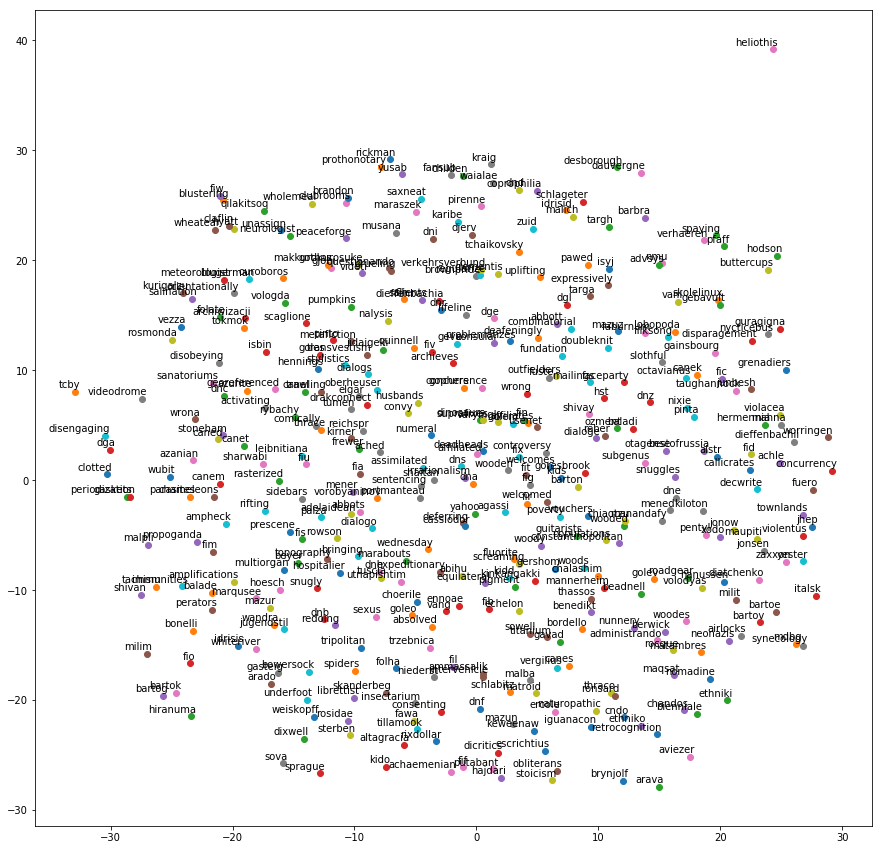

In [35]:
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(embedding[1:num_points+1, :])

def plot(embeddings, labels):
    pylab.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    pylab.show()
    
words = [int2word[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

